# PowerTransformer

- When desired output is more “Gaussian” like
- Currently has ‘Box-Cox’ and ‘Yeo-Johnson’  transforms
- Box-Cox requires the input data to be strictly positive (not even zero is acceptable).
- For features which have zeroes or negative values, Yeo-Johnson comes to the rescue.

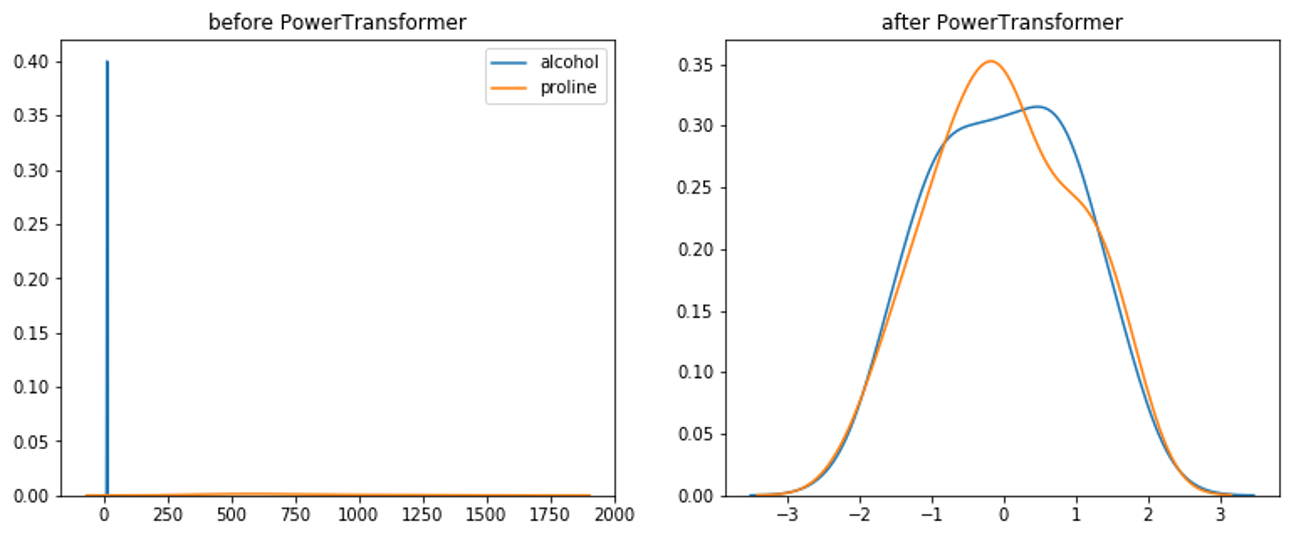

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

ValueError: The Box-Cox transformation can only be applied to strictly positive data

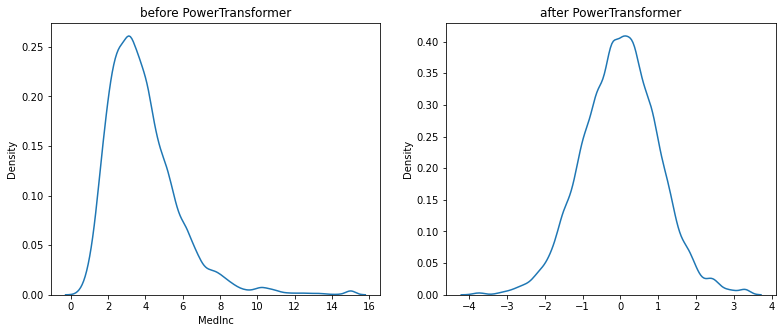

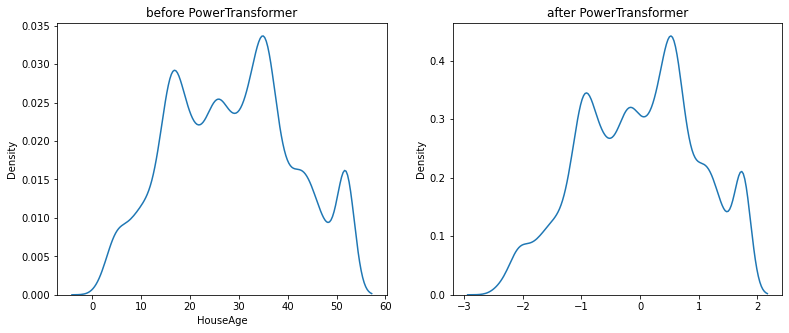

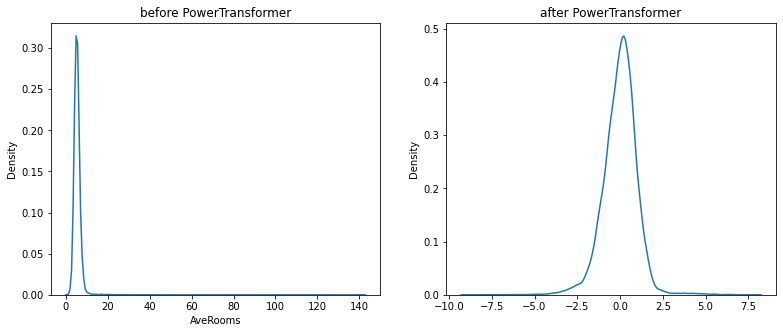

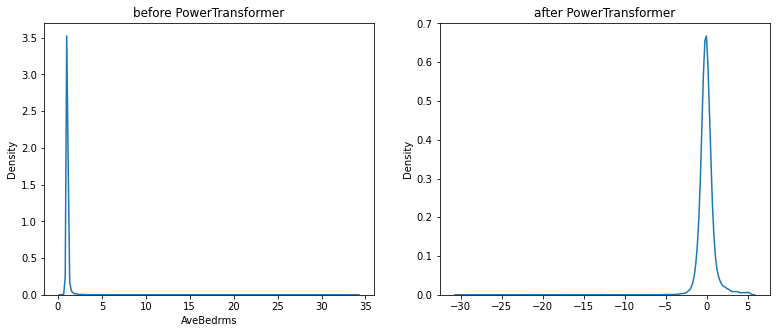

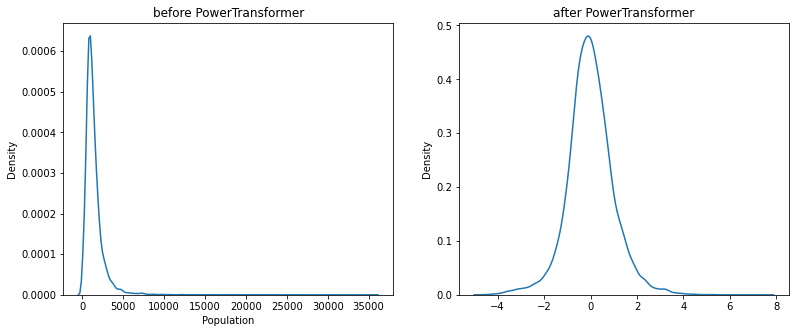

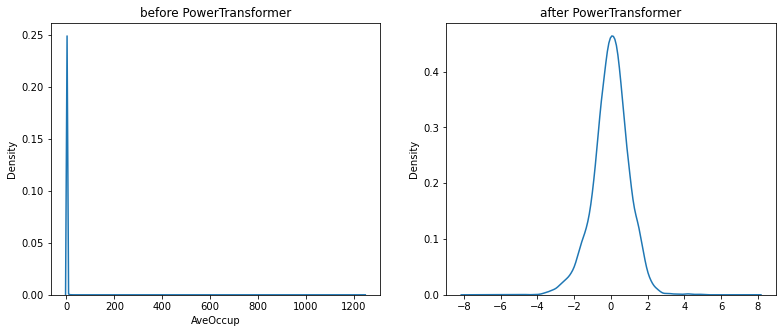

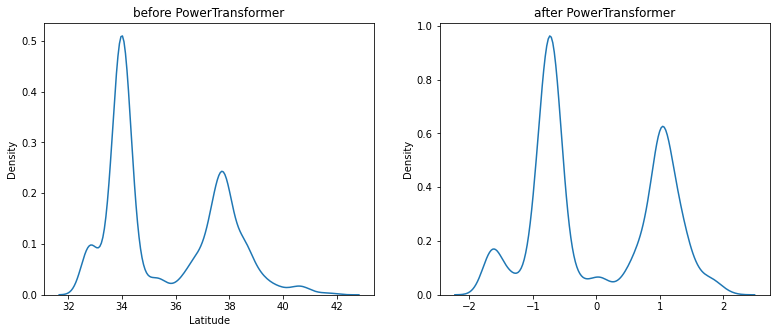

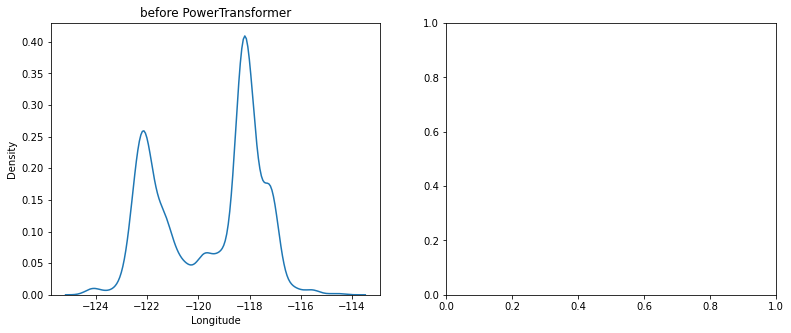

In [9]:
for col in X.columns:
    plots(X, col, PowerTransformer(method='box-cox'))

Since there is negative/Zero value in longitude therefore it gave error

In [10]:
#let's drop that col
X = X.iloc[:, :-1]

In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85


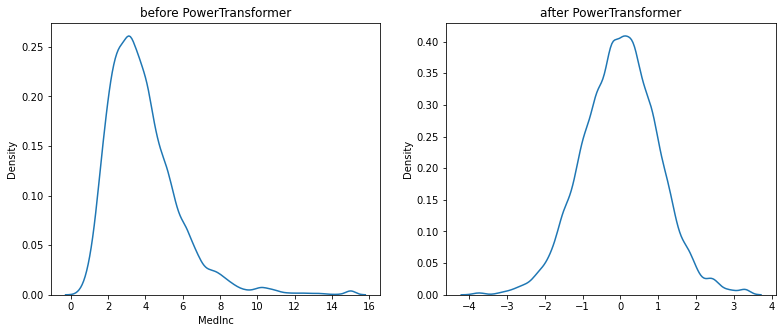

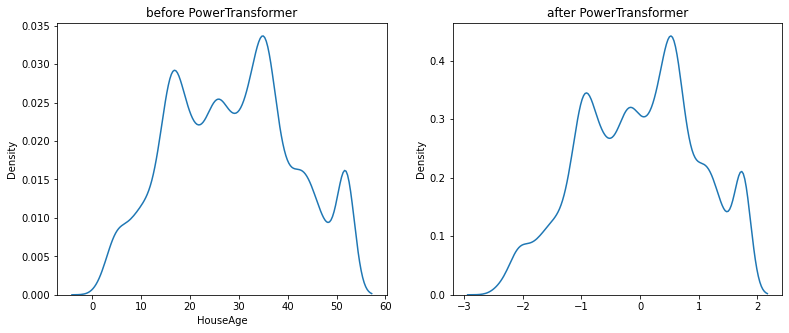

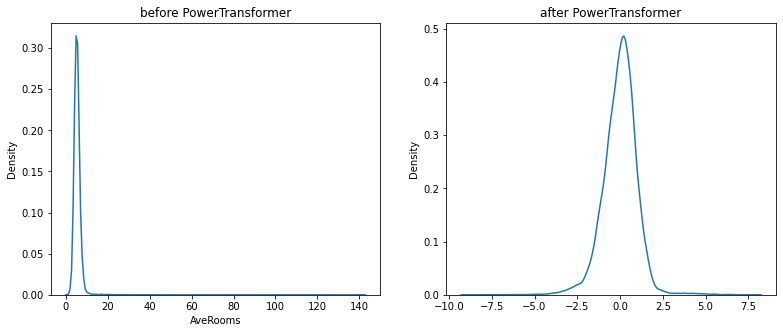

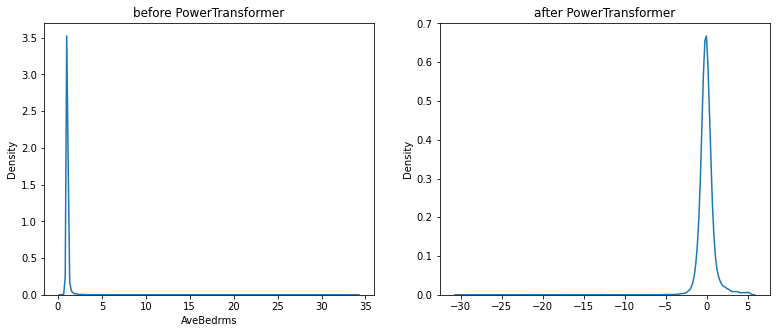

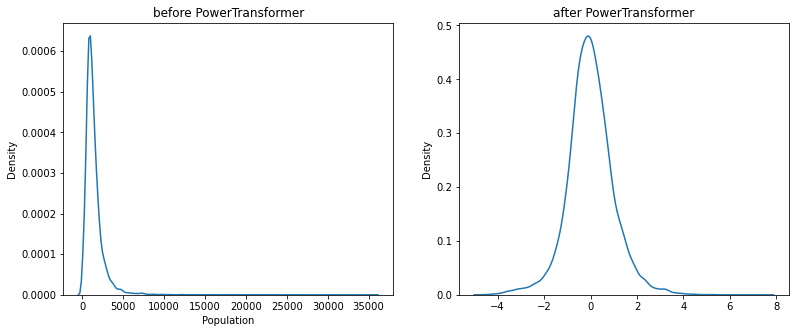

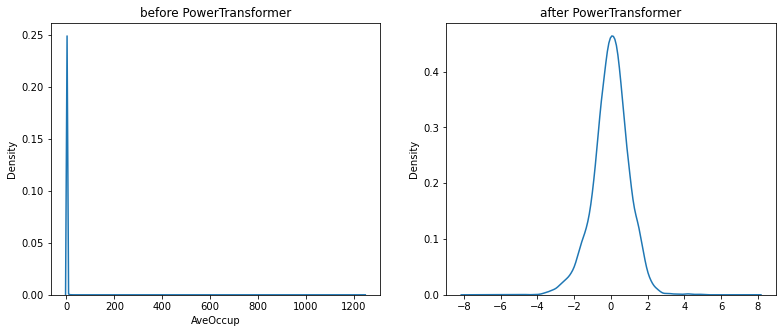

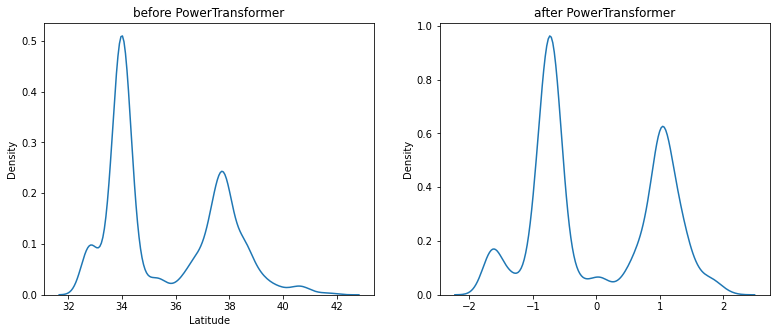

In [12]:
for col in X.columns:
    plots(X, col, PowerTransformer(method='box-cox'))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

# Note: For the more mathematically inclined you can calculate kutosis and skew of each feature before and after transformation to get a better feel of how good the transformation is

In [14]:
p = PowerTransformer(method='box-cox')
p.fit_transform(X_train)

array([[ 0.40281908, -1.92782549,  1.42598869, ..., -1.96446909,
         0.84580969, -0.83863782],
       [ 0.47870349,  1.75743614,  0.12767532, ...,  0.32304211,
         0.65346554,  1.04268954],
       [ 0.24184739, -0.16025422, -0.36702734, ..., -0.21606302,
        -0.01882737, -0.83863782],
       ...,
       [-0.19787028,  0.22945234, -1.35085249, ..., -0.70907513,
        -1.94051908,  0.61444907],
       [ 1.02558383,  0.45750336, -0.47358212, ..., -0.17597578,
        -0.89334188, -0.98244217],
       [-1.88200113, -1.07487729, -1.04180675, ..., -0.21336265,
         0.77358437, -1.60187882]])

In [15]:
p.lambdas_

array([ 0.09829722,  0.81124522, -0.28269234, -1.58333516,  0.23291759,
       -0.49773797, -5.30756627])

# Also When we now transform the test set these lambdas which we learnt from the training set will be used to transform the test set

In [16]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', PowerTransformer(method='box-cox')),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [17]:
model_accuracy_scaled(KNeighborsRegressor())

0.6709942914017089

In [18]:
model_accuracy_unscaled(KNeighborsRegressor())

0.16130990811955548

In [19]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.7203966715347371

In [20]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.7202274392305013